# Heart Disease Research Part I: Cholesterol, Fasting Blood Sugar (FBS)

In [2]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
# load data
heart = pd.read_csv('heart_disease.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

In [5]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [6]:
heart.info

<bound method DataFrame.info of       age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0    63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1    67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2    67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3    37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4    41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   
..    ...     ...       ...    ...               ...    ...  ...      ...   
298  45.0    male     110.0  264.0    typical angina    0.0  0.0    132.0   
299  68.0    male     144.0  193.0      asymptomatic    0.0  1.0    141.0   
300  57.0    male     130.0  131.0      asymptomatic    1.0  0.0    115.0   
301  57.0  female     130.0  236.0   atypical angina    0.0  0.0    174.0   
302  38.0    male     138.0  175.0  non-anginal pain    0.0  0.0    173.0   

    heart_disease  
0         absence  
1  

### Cholesterol Analysis

In [17]:
# YES_HD - CHOLESTEROL
chol_yes_hd = yes_hd.chol
#print(chol_hd.head())

chol_yes_hd_mean = chol_yes_hd.mean().round(2)
print('People with HD have mean cholesterol higher than 240 mg/dl:', chol_yes_hd_mean) # people with HD have mean cholesterol higher than 240 mg/dl - 251.47

# Hypothesis test: Is mean cholesterol in the heart disease group > 240 mg/dl?
# (one-sample t-test vs 240; scipy returns two-sided p, so we halve it for a one-sided test)
from scipy.stats import ttest_1samp
POPMEAN = 240
alpha = 0.05

stat, p_value_chol = ttest_1samp(chol_yes_hd, POPMEAN)
print('T-statistics:', stat)
print('p-value:', p_value_chol)
# devide p-value by two, to get one-sided test:
print('Final p-value:', p_value_chol/2)

if p_value_chol/2 < alpha:
    print('reject the null hypothesis; People with heart disease DO NOT have an average cholesterol level equal to 240 mg/dl - their average cholesterol level is significantly greater.')
else:
    print('fail to reject the null hypothesis; People with heart disease have an average cholesterol level equal to 240 mg/dl.')

People with HD have mean cholesterol higher than 240 mg/dl: 251.47
T-statistics: 2.7337803003099808
p-value: 0.007082206781031141
Final p-value: 0.0035411033905155707
reject the null hypothesis; People with heart disease DO NOT have an average cholesterol level equal to 240 mg/dl - their average cholesterol level is significantly greater.


In [18]:
# NO_HD - CHOLESTEROL
chol_no_hd = no_hd.chol
#print(chol_hd.head())

chol_no_hd_mean = chol_no_hd.mean().round(2)
print('People without HD have mean cholesterol:', chol_no_hd_mean)

# Hypothesis test: Is mean cholesterol in the no-heart-disease group > 240 mg/dl?
# (one-sample t-test vs 240; scipy returns two-sided p, so we halve it for a one-sided test)
from scipy.stats import ttest_1samp
POPMEAN = 240
alpha = 0.05

stat, p_value = ttest_1samp(chol_no_hd, POPMEAN)
print('T-statistics:', stat)
print('p-value:', p_value)
# devide p-value by two, to get one-sided test:
print('Final p-value:', p_value/2)

if p_value/2 < alpha:
    print('reject the null hypothesis; People without heart disease DO NOT have an average cholesterol level equal to 240 mg/dl - their average cholesterol level is significantly greater.')
else:
    print('fail to reject the null hypothesis; People without heart disease have an average cholesterol level equal to 240 mg/dl.')

People without HD have mean cholesterol: 242.64
T-statistics: 0.6325062182479374
p-value: 0.5279424046444101
Final p-value: 0.26397120232220506
fail to reject the null hypothesis; People without heart disease have an average cholesterol level equal to 240 mg/dl.


Cholesterol

Heart disease group (presence): mean cholesterol 251.47 mg/dl, which is significantly > 240 (one-sample t-test; two-sided p=0.0071 → one-sided p≈0.0035).
Interpretation: in this sample, heart disease patients tend to have high cholesterol on average.

No heart disease group (absence): mean cholesterol 242.64 mg/dl, not significantly > 240 (p=0.528).
Interpretation: the non-HD group does not show evidence of mean cholesterol above 240.

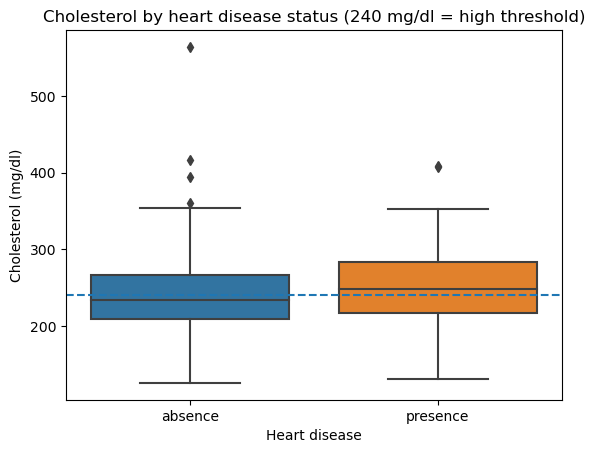

In [19]:
# Boxplot of Cholesterol by heart disease status

plt.clf()
sns.boxplot(x="heart_disease", y="chol", data=heart, order=["absence","presence"])
plt.axhline(240, linestyle="--")
plt.xlabel("Heart disease")
plt.ylabel("Cholesterol (mg/dl)")
plt.title("Cholesterol by heart disease status (240 mg/dl = high threshold)")
plt.show()

### Fasting Blood Sugar Analysis

In [20]:
# Count total patients in the dataset (N)
num_patients = heart.chol.count()
print('There is data for', num_patients, 'patients.')
#print(heart.fbs.head())

There is data for 303 patients.


In [21]:
# Count patients with high fasting blood sugar (fbs == 1)
num_highfbs_patients = 0

for r in heart.fbs:
  if r == 1.0:
    num_highfbs_patients += 1

print('There is', num_highfbs_patients, 'patients with fasting blood sugar greater than 120 mg/dl.')

There is 45 patients with fasting blood sugar greater than 120 mg/dl.


In [22]:
# another way of doing it:
num_highfbs_patients2 = np.sum(heart.fbs == 1.0)
print(num_highfbs_patients2)

45


In [23]:
# Population benchmark: expected count with diabetes if prevalence is 8%
expected_diabetes = round(0.08 * num_patients)
print('If fasting blood sugar levels greater than 120 mg/dl is indicative of diabetes and our sample is representative of the population,', expected_diabetes, 'people would be expected to have diabetes, which is almost half the number with fbs > 120 in the sample (45).')

If fasting blood sugar levels greater than 120 mg/dl is indicative of diabetes and our sample is representative of the population, 24 people would be expected to have diabetes, which is almost half the number with fbs > 120 in the sample (45).


In [24]:
# Hypothesis test: Is the high-FBS rate in this sample > 8%? (binomial test, one-sided)
from scipy.stats import binomtest

alpha = 0.05

result = binomtest(k=num_highfbs_patients, n=num_patients, p=0.08, alternative="greater")
print(result.pvalue)

if result.pvalue < alpha:
    print('reject the null hypothesis: This sample was NOT drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl - it is evidence that the rate is greater than 8%.')
else:
    print('fail to reject the null hypothesis: not enough evidence that this sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl.')

4.689471951448875e-05
reject the null hypothesis: This sample was NOT drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl - it is evidence that the rate is greater than 8%.


Fasting blood sugar (FBS >120)

Dataset size: 303 patients

High FBS count: 45 patients → 14.85% of the sample (45/303)

If the sample matched a population diabetes estimate of 8%, expected count would be ~24, but observed is 45 (almost double).

Binomial test (greater than 8%) p ≈ 4.69e-05 → significantly higher than 8%.
Interpretation: this clinical sample has an elevated high-FBS rate vs the 1988 population estimate (not surprising—this is a clinic evaluation dataset, not a random population sample).

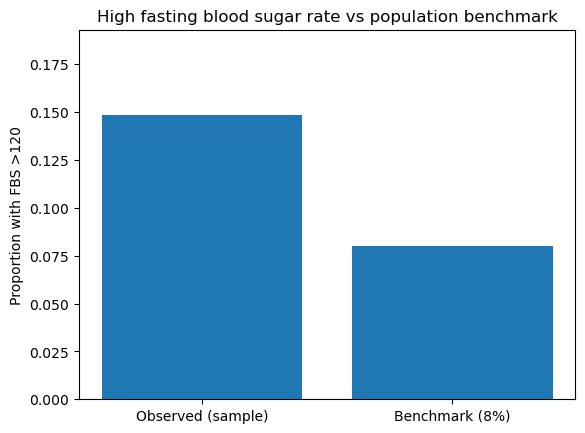

In [25]:
import matplotlib.pyplot as plt

plt.clf()
observed = 45/303
benchmark = 0.08
plt.bar(["Observed (sample)", "Benchmark (8%)"], [observed, benchmark])
plt.ylabel("Proportion with FBS >120")
plt.title("High fasting blood sugar rate vs population benchmark")
plt.ylim(0, max(observed, benchmark)*1.3)
plt.show()


# Heart Disease Research Part II: Heart Disease, Exercise, Chest Pain

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
# Quick look at the dataset
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


### Predictors of Heart Disease

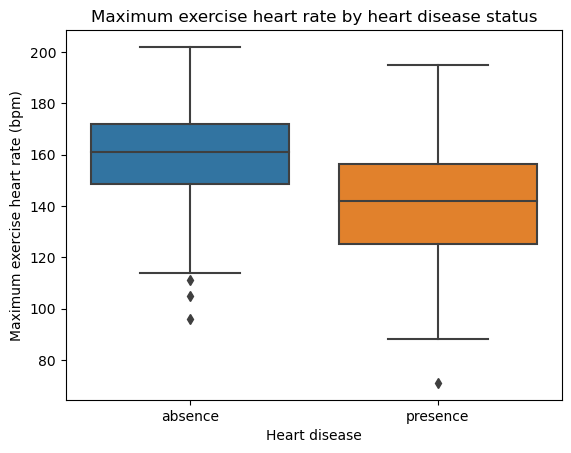

In [28]:
# Visualize max exercise heart rate (thalach) by heart disease status

plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.xlabel("Heart disease")
plt.ylabel("Maximum exercise heart rate (bpm)")
plt.title("Maximum exercise heart rate by heart disease status")
plt.show()

The plot shows that patients diagnosed with heart disease generally had a lower maximum heart rate during their exercise test.

<Figure size 640x480 with 0 Axes>

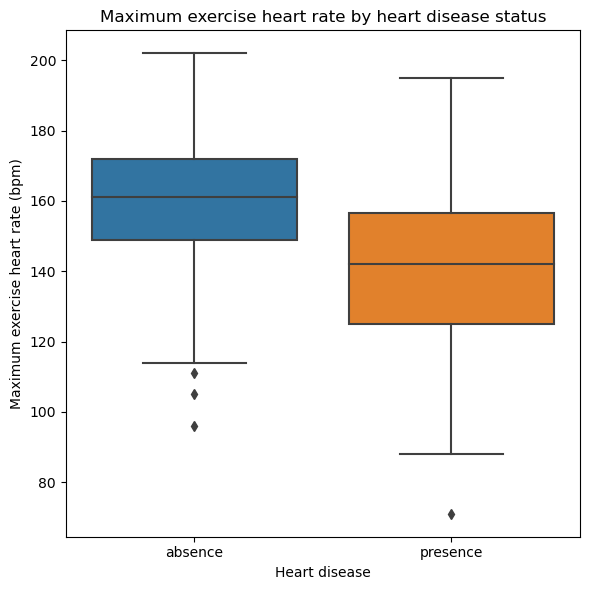

In [42]:
# make the figure above a SQUARE - for poster

plt.clf()

# Square figure
fig, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x=heart.heart_disease, y=heart.thalach, ax=ax)

ax.set_xlabel("Heart disease")
ax.set_ylabel("Maximum exercise heart rate (bpm)")
ax.set_title("Maximum exercise heart rate by heart disease status")

plt.tight_layout()

# Save as JPG for download
plt.savefig("Maximum exercise heart rate by heart disease status.jpg", dpi=300, bbox_inches="tight")

plt.show()

In [29]:
# Split thalach into two groups: heart disease presence vs absence
thalach_yes_hd = heart.thalach[heart.heart_disease=='presence']
thalach_no_hd = heart.thalach[heart.heart_disease=='absence']

# Compare groups with simple descriptive stats (difference in mean and median)
mean_diff = np.mean(thalach_yes_hd) - np.mean(thalach_no_hd)
print('thalach mean difference:', mean_diff)

median_diff = np.median(thalach_yes_hd) - np.median(thalach_no_hd)
print('thalach median difference:', median_diff)# Split thalach into two groups: heart disease presence vs absence
thalach_yes_hd = heart.thalach[heart.heart_disease=='presence']
thalach_no_hd = heart.thalach[heart.heart_disease=='absence']

# Compare groups with simple descriptive stats (difference in mean and median)
mean_diff = np.mean(thalach_yes_hd) - np.mean(thalach_no_hd)
print('thalach mean difference:', mean_diff)

median_diff = np.median(thalach_yes_hd) - np.median(thalach_no_hd)
print('thalach median difference:', median_diff)

thalach mean difference: -19.11905597473242
thalach median difference: -19.0
thalach mean difference: -19.11905597473242
thalach median difference: -19.0


In [30]:
# Hypothesis test: Compare mean thalach between presence vs absence (two-sample t-test, two-sided)
from scipy.stats import ttest_ind
alpha = 0.05

stat, p_value = ttest_ind(thalach_yes_hd, thalach_no_hd)
print('T-statistic:', stat)
print('p-value:', p_value)

if p_value < alpha:
    print('reject the null hypothesis: There is a significant difference in thalach for people with heart disease compared to people without heart disease.')
else:
    print('fail to reject the null hypothesis; not enough evidence that the average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.')

T-statistic: -7.9636186823270485
p-value: 3.456964908430172e-14
reject the null hypothesis: There is a significant difference in thalach for people with heart disease compared to people without heart disease.


Thalach (max exercise heart rate) vs heart disease

Mean and median differences were about −19 bpm (HD group lower).
Interpretation: people diagnosed with heart disease hit lower max HR during exercise testing.

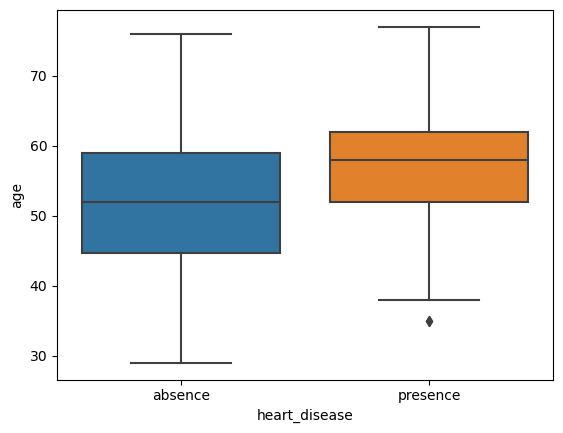

age mean difference: 4.040533426917001
age median difference: 6.0
T-statistic: 3.971100226293655
p-value: 8.955636917529706e-05
reject the null hypothesis: There is a significant difference in age for people with heart disease compared to people without heart disease.


In [31]:
# Explore age vs heart disease: boxplot + group differences
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()
# the plot shows that patients diagnosed with heart disease were generally older than those without heart disease.

age_yes_hd = heart.age[heart.heart_disease=='presence']
age_no_hd = heart.age[heart.heart_disease=='absence']

mean_diff_age = np.mean(age_yes_hd) - np.mean(age_no_hd)
print('age mean difference:', mean_diff_age)

median_diff_age = np.median(age_yes_hd) - np.median(age_no_hd)
print('age median difference:', median_diff_age)

# Hypothesis test: Compare mean age between presence vs absence (two-sample t-test, two-sided)
stat_age, p_value_age = ttest_ind(age_yes_hd, age_no_hd)
print('T-statistic:', stat_age)
print('p-value:', p_value_age)

if p_value_age < alpha:
    print('reject the null hypothesis: There is a significant difference in age for people with heart disease compared to people without heart disease.')
else:
    print('fail to reject the null hypothesis; not enough evidence that the average age of a person with heart disease is equal to the average age of a person without heart disease.')

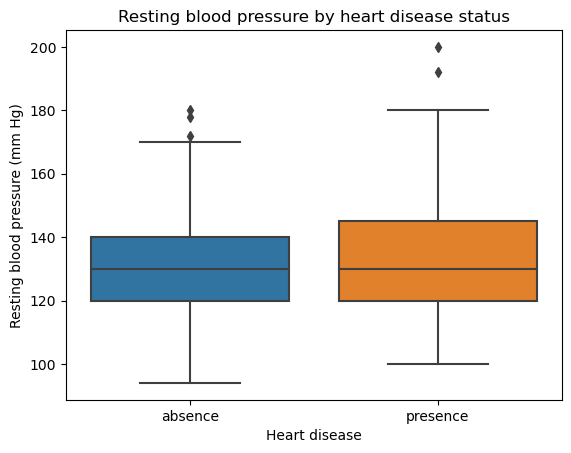

trestbps mean difference: 5.318345323740999
trestbps median difference: 0.0
T-statistic: 2.647004396805282
p-value: 0.008548268928594928
reject the null hypothesis: There is a significant difference in trestbps for people with heart disease compared to people without heart disease.


In [32]:
# Explore resting blood pressure (trestbps) vs heart disease: boxplot + group differences
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.xlabel("Heart disease")
plt.ylabel("Resting blood pressure (mm Hg)")
plt.title("Resting blood pressure by heart disease status")
plt.show()


trestbps_yes_hd = heart.trestbps[heart.heart_disease=='presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease=='absence']

mean_diff_trestbps = np.mean(trestbps_yes_hd) - np.mean(trestbps_no_hd)
print('trestbps mean difference:', mean_diff_trestbps)

median_diff_trestbps = np.median(trestbps_yes_hd) - np.median(trestbps_no_hd)
print('trestbps median difference:', median_diff_trestbps)

# Hypothesis test: Compare mean resting BP between presence vs absence (two-sample t-test, two-sided)
stat_trestbps, p_value_trestbps = ttest_ind(trestbps_yes_hd, trestbps_no_hd)
print('T-statistic:', stat_trestbps)
print('p-value:', p_value_trestbps)

if p_value_trestbps < alpha:
    print('reject the null hypothesis: There is a significant difference in trestbps for people with heart disease compared to people without heart disease.')
else:
    print('fail to reject the null hypothesis; not enough evidence that the average trestbps of a person with heart disease is equal to the average age of a person without heart disease.')

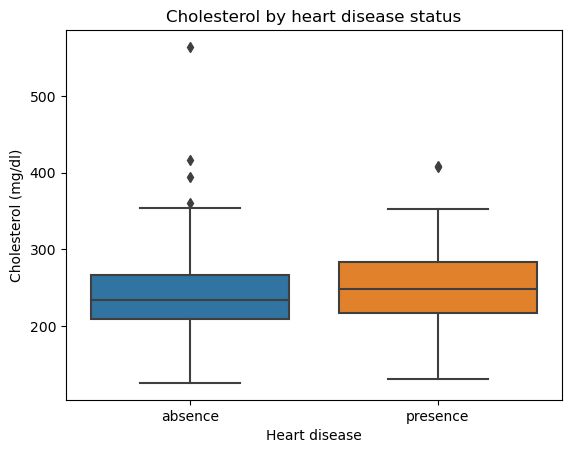

chol mean difference: 8.834576241445887
chol median difference: 14.5
T-statistic: 1.4924048025749725
p-value: 0.1366486884334473
fail to reject the null hypothesis; not enough evidence that there is a significant difference in chol for people with heart disease compared to people without heart disease.


In [33]:
# Explore cholesterol (chol) vs heart disease: boxplot + group differences
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.xlabel("Heart disease")
plt.ylabel("Cholesterol (mg/dl)")
plt.title("Cholesterol by heart disease status")
plt.show()

chol_yes_hd = heart.chol[heart.heart_disease=='presence']
chol_no_hd = heart.chol[heart.heart_disease=='absence']

mean_diff_chol = np.mean(chol_yes_hd) - np.mean(chol_no_hd)
print('chol mean difference:', mean_diff_chol)

median_diff_chol = np.median(chol_yes_hd) - np.median(chol_no_hd)
print('chol median difference:', median_diff_chol)

# Hypothesis test: Compare mean cholesterol between presence vs absence (two-sample t-test, two-sided)
stat_chol, p_value_chol = ttest_ind(chol_yes_hd, chol_no_hd, equal_var=False)
print('T-statistic:', stat_chol)
print('p-value:', p_value_chol)

if p_value_chol < alpha:
    print('reject the null hypothesis: There is a significant difference in chol for people with heart disease compared to people without heart disease.')
else:
    print('fail to reject the null hypothesis; not enough evidence that there is a significant difference in chol for people with heart disease compared to people without heart disease.')

### Important consideration:
HD patients are above the high-cholesterol threshold on average. (Part 1)

But cholesterol alone does not significantly distinguish HD vs no-HD in this sample. (Part 2)

### Chest Pain and Max Heart Rate

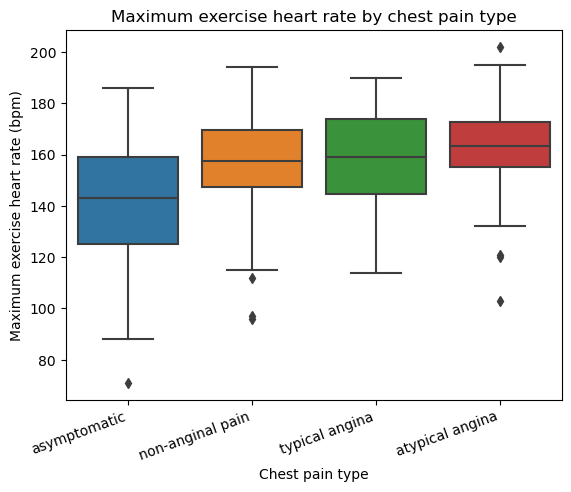

In [34]:
# Visualize thalach by chest pain type (cp)

# plt.clf()
# sns.boxplot(x = heart.cp, y = heart.thalach)
# plt.show()

# alternative boxplot: sort categories by median thalach so it’s easier to read
plt.clf()
order = heart.groupby("cp")["thalach"].median().sort_values().index
sns.boxplot(x="cp", y="thalach", data=heart, order=order)
plt.xticks(rotation=20, ha="right")
plt.xlabel("Chest pain type")
plt.ylabel("Maximum exercise heart rate (bpm)")
plt.title("Maximum exercise heart rate by chest pain type")
plt.show()

In [33]:
# Create thalach arrays for each chest pain category (for ANOVA/Tukey)
thalach_typical  = heart.loc[heart["cp"] == "typical angina",   "thalach"].dropna()
thalach_asymptom = heart.loc[heart["cp"] == "asymptomatic",     "thalach"].dropna()
thalach_nonangin = heart.loc[heart["cp"] == "non-anginal pain", "thalach"].dropna()
thalach_atypical = heart.loc[heart["cp"] == "atypical angina",  "thalach"].dropna()

In [34]:
# Hypothesis test: Do all chest pain groups have the same mean thalach? (one-way ANOVA)
from scipy.stats import f_oneway

alpha = 0.05

stat, pval = f_oneway(
  thalach_typical,
  thalach_asymptom,
  thalach_nonangin,
  thalach_atypical
)

print('pval:', pval)

if pval < alpha:
    print('reject the null hypothesis; People with typical angina, non-anginal pain, atypical angina, and asymptomatic people DO NOT have the same average thalach (conclusion: there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach)).')
else:
    print("fail to reject the null hypothesis; there's no evidence that people with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.")

pval: 1.9065505247705008e-10
reject the null hypothesis; People with typical angina, non-anginal pain, atypical angina, and asymptomatic people DO NOT have the same average thalach (conclusion: there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach)).


In [35]:
# Post-hoc test: Identify which chest pain pairs differ (Tukey HSD, FWER=0.05)
# If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) 
# for which people with those pain types have significantly different average max heart rates during exercise (thalach).
# Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = heart.dropna(subset=["thalach", "cp"])
tukey = pairwise_tukeyhsd(endog=df["thalach"], groups=df["cp"], alpha=0.05)
print(tukey)

# show only the significant pairs
# Convert Tukey summary table to a DataFrame
tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# Keep only significant comparisons
sig = tukey_df[tukey_df["reject"] == True].copy()

# Optional: sort by adjusted p-value
sig["p-adj"] = sig["p-adj"].astype(float)
sig = sig.sort_values("p-adj")

print(sig[["group1", "group2", "meandiff", "p-adj", "lower", "upper"]])
# the outputted table shows that only comparisons involving asymptomatic are significant; all other pairs are not significantly different (asymptomatic stands apart; the other three are similar to each other).
# In the significant rows, group1 is asymptomatic and meandiff is positive, meaning: Atypical / Non-anginal / Typical have higher mean thalach than Asymptomatic.
# So asymptomatic patients have a lower average max heart rate (thalach) than the other pain types.
print('-----')
print(heart.groupby("cp")["thalach"].mean().sort_values())
# Conclusion: there is at least one pair with different mean thalach, and the difference is driven by the asymptomatic group having a significantly lower mean thalach than all other chest pain categories.

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------
         group1            group2  meandiff   p-adj    lower    upper
0  asymptomatic   atypical angina   21.7394  0.0000  12.7442  30.7347
1  asymptomatic  non-anginal pain   14.7264  0.0000   7.2583  22.1945
2  asymptomatic    typical angina   15.2760  0.008

Chest pain type (cp) vs thalach

One-way ANOVA supports that mean thalach differs by cp.

Tukey HSD shows the key pattern: asymptomatic has significantly lower mean thalach than each other cp type; the other three cp categories are not significantly different from one another.

### Heart Disease and Chest Pain

In [37]:
# Contingency table: chest pain type (cp) vs heart disease status

Xtab = pd.crosstab(heart.cp, heart.heart_disease, margins=True)
print(Xtab)
# Based on this table, it seems like people who are diagnosed with heart disease tend to be asymptomatic, 
# while people with who are not diagnosed with heart disease tend to have different kinds of chest pain. 
# This helps explain our findings on the relationship between chest pain and max heart rate above. 
# However, we’d have to do more research to try to understand why this is the case. It seems a little counter-intuitive!

heart_disease     absence  presence  All
cp                                      
asymptomatic           39       105  144
atypical angina        41         9   50
non-anginal pain       68        18   86
typical angina         16         7   23
All                   164       139  303


In [38]:
# Hypothesis test: Are cp and heart_disease associated? (chi-square test of independence)
from scipy.stats import chi2_contingency

Xtab = pd.crosstab(heart["cp"], heart["heart_disease"])

chi2, pval, dof, expected = chi2_contingency(Xtab)
print("pval:", pval)

if pval < 0.05:
    print('reject the null hypothesis; There is a significant association between chest pain type and whether or not someone is diagnosed with heart disease.')
else:
    print("fail to reject the null hypothesis; there's no evidence that there is an association between chest pain type and whether or not someone is diagnosed with heart disease.")
# conclusion:
# Chest pain type and heart disease diagnosis are significantly associated in this sample (χ² test of independence, p = 1.25e−17).
# NB! This tells me there is an association, but not which categories drive it. From the contingency table, 
# the association is mainly driven by asymptomatic patients being much more likely to be in the “presence” group, 
# while atypical/non-anginal pain are more common in “absence”.

pval: 1.2517106007837527e-17
reject the null hypothesis; There is a significant association between chest pain type and whether or not someone is diagnosed with heart disease.


Chest pain type (cp) vs heart disease

Very strong association: χ² test p ≈ 1.25e−17.

Contingency table shows why:

asymptomatic: 105 presence vs 39 absence (high HD rate)

other cp types skew more toward absence

<Figure size 640x480 with 0 Axes>

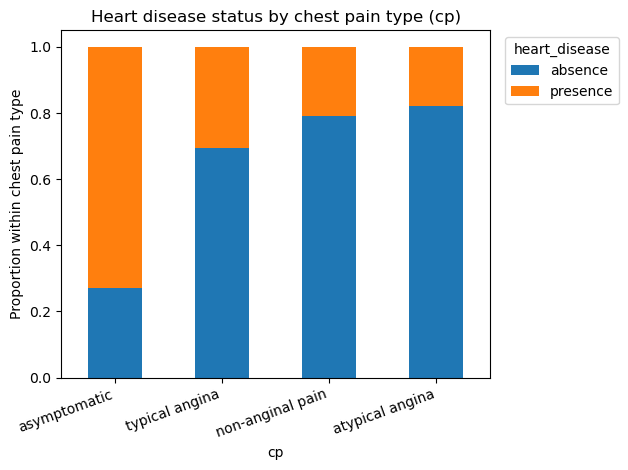

In [7]:
plt.clf()

# Proportions within each chest pain type
cp_rate = pd.crosstab(heart["cp"], heart["heart_disease"], normalize="index")

# Sort by descending presence rate
order = cp_rate["presence"].sort_values(ascending=False).index
cp_rate = cp_rate.loc[order]

cp_rate.plot(kind="bar", stacked=True)
plt.ylabel("Proportion within chest pain type")
plt.xticks(rotation=20, ha="right")
plt.title("Heart disease status by chest pain type (cp)")
plt.legend(title="heart_disease", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

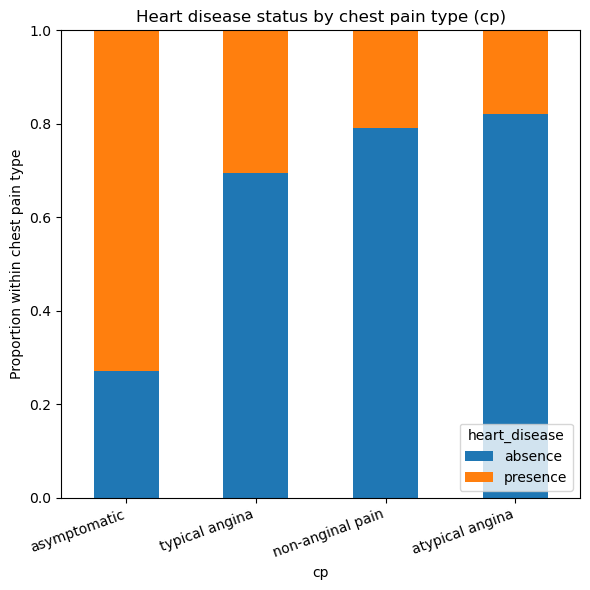

In [36]:
# make the figure above a SQUARE - for poster
plt.clf()

# Proportions within each chest pain type
cp_rate = pd.crosstab(heart["cp"], heart["heart_disease"], normalize="index")

# Sort by descending presence rate
order = cp_rate["presence"].sort_values(ascending=False).index
cp_rate = cp_rate.loc[order]

# Make a square figure
fig, ax = plt.subplots(figsize=(6, 6))  # square: width == height

cp_rate.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel("Proportion within chest pain type")
ax.set_title("Heart disease status by chest pain type (cp)")
ax.set_ylim(0, 1)

plt.xticks(rotation=20, ha="right")

# Legend in lower right
ax.legend(title="heart_disease", loc="lower right")

plt.tight_layout()

# Save as JPG for download
plt.savefig("Heart disease status by chest pain type (cp).jpg", dpi=300, bbox_inches="tight")

plt.show()


In [38]:
# Additional exploration: other predictors (exang, age, sex) vs heart disease
# I choose exang and age+sex.

# relationship btwx exang and yes_hd or no_hd
# heart.head()

# Contingency table + proportions

X_exang = pd.crosstab(heart["exang"], heart["heart_disease"])
print(X_exang)

rate_exang = pd.crosstab(heart["exang"], heart["heart_disease"], normalize="index")
print("\nProportions within exang:")
print(rate_exang)

heart_disease  absence  presence
exang                           
0.0                141        63
1.0                 23        76

Proportions within exang:
heart_disease   absence  presence
exang                            
0.0            0.691176  0.308824
1.0            0.232323  0.767677


<Figure size 640x480 with 0 Axes>

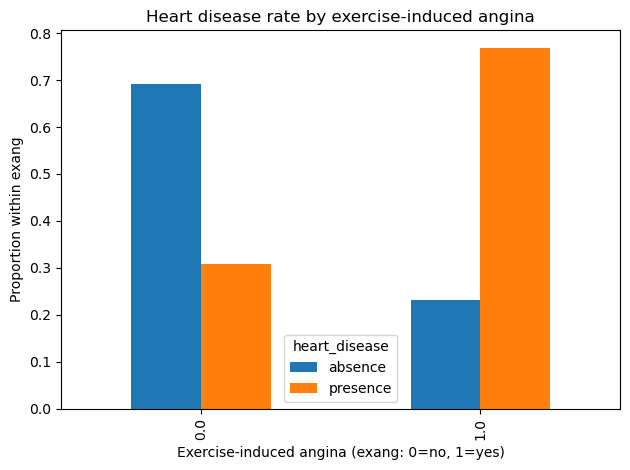

In [39]:
# Visualization: stacked bar

plt.clf()
rate_exang.plot(kind="bar")
plt.xlabel("Exercise-induced angina (exang: 0=no, 1=yes)")
plt.ylabel("Proportion within exang")
plt.title("Heart disease rate by exercise-induced angina")
plt.legend(title="heart_disease")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

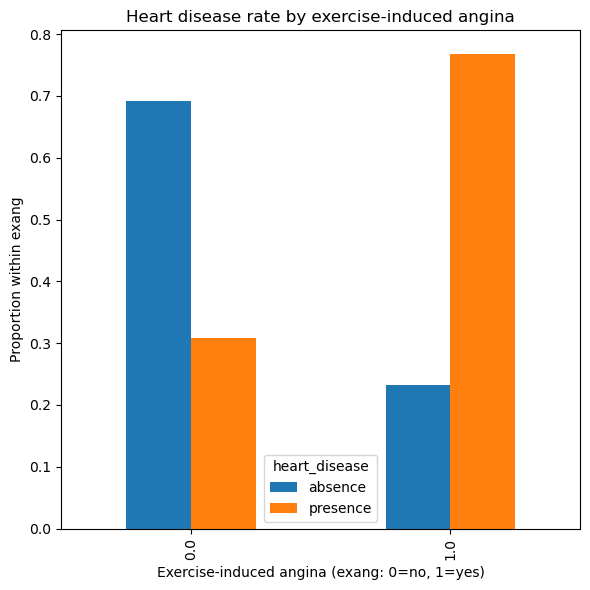

In [41]:
# make the figure above a SQUARE - for poster

plt.clf()

# Square figure
fig, ax = plt.subplots(figsize=(6, 6))

rate_exang.plot(kind="bar", ax=ax)

ax.set_xlabel("Exercise-induced angina (exang: 0=no, 1=yes)")
ax.set_ylabel("Proportion within exang")
ax.set_title("Heart disease rate by exercise-induced angina")

# Legend (keep it neat; change loc if you prefer)
ax.legend(title="heart_disease")

plt.tight_layout()

# Save as JPG for download
plt.savefig("Heart disease rate by exercise-induced angina.jpg", dpi=300, bbox_inches="tight")

plt.show()


In [46]:
# hypothesis test: Chi-square test
# H0: exang and heart_disease are independent (no association)
# H1: they are associated

from scipy.stats import chi2_contingency

chi2, pval_exang, dof, expected = chi2_contingency(X_exang)
print("\nChi-square p-value:", pval_exang)

alpha = 0.05
if pval_exang < alpha:
    print("Reject H0: exang is significantly associated with heart disease.")
else:
    print("Fail to reject H0: not enough evidence of association.")


Chi-square p-value: 1.413788096718085e-13
Reject H0: exang is significantly associated with heart disease.


In [47]:
hd_rate_exang0 = rate_exang.loc[0, "presence"]
hd_rate_exang1 = rate_exang.loc[1, "presence"]
print(f"\nHeart disease rate: exang=0 -> {hd_rate_exang0:.1%}, exang=1 -> {hd_rate_exang1:.1%}")


Heart disease rate: exang=0 -> 30.9%, exang=1 -> 76.8%


### Interpretation:
Contingency table (counts)

exang = 0 (no exercise-induced angina): 63/204 have heart disease --> 30.9%
exang = 1 (yes exercise-induced angina): 76/99 have heart disease --> 76.8%

So the heart disease rate is much higher when patients report exercise-induced angina.

Hypothesis test

Chi-square p-value = 1.41e−13 (< 0.05)

Reject H0 → exang and heart disease are significantly associated.

“Effect size” in plain English

Patients with exercise-induced angina had a 76.8% heart disease rate vs 30.9% without it (χ² p = 1.41e−13).

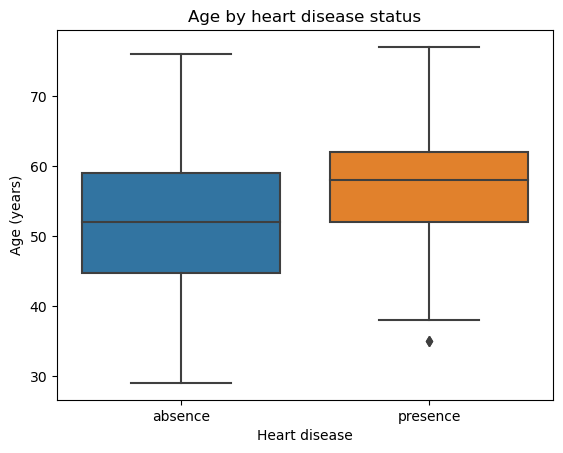

Mean age (presence): 56.62589928057554
Mean age (absence): 52.58536585365854
Mean difference (presence - absence): 4.040533426917001
Median age (presence): 58.0
Median age (absence): 52.0
Median difference (presence - absence): 6.0
Welch t-test p-value: 7.061439075547293e-05
Reject H0: age differs significantly by heart disease status.


In [49]:
# relationship btwx age and yes_hd or no_hd

from scipy.stats import ttest_ind

alpha = 0.05

# Split age by diagnosis
age_hd = heart.loc[heart["heart_disease"] == "presence", "age"].dropna()
age_no = heart.loc[heart["heart_disease"] == "absence", "age"].dropna()

# 1) Plot
plt.clf()
sns.boxplot(x="heart_disease", y="age", data=heart, order=["absence", "presence"])
plt.xlabel("Heart disease")
plt.ylabel("Age (years)")
plt.title("Age by heart disease status")
plt.show()

# 2) Descriptives + simple effect sizes
mean_diff = age_hd.mean() - age_no.mean()
median_diff = age_hd.median() - age_no.median()

print("Mean age (presence):", age_hd.mean())
print("Mean age (absence):", age_no.mean())
print("Mean difference (presence - absence):", mean_diff)

print("Median age (presence):", age_hd.median())
print("Median age (absence):", age_no.median())
print("Median difference (presence - absence):", median_diff)

# 3) Hypothesis test (Welch two-sample t-test)
stat, pval_age = ttest_ind(age_hd, age_no, equal_var=False)
print("Welch t-test p-value:", pval_age)

if pval_age < alpha:
    print("Reject H0: age differs significantly by heart disease status.")
else:
    print("Fail to reject H0: not enough evidence that age differs by heart disease status.")

### Interpretation:
The heart disease (presence) group is older on average:

Mean age: 56.6 vs 52.6 (difference +4.0 years)

Median age: 58 vs 52 (difference +6 years)

The boxplot matches this: the whole “presence” distribution is shifted older.

Welch t-test p = 7.06e−05 (< 0.05) → statistically significant difference.


Age is significantly associated with heart disease: patients with heart disease are older on average (+4.0 years, median +6); Welch t-test p = 7.06e−05.

heart_disease  absence  presence
sex                             
female              72        25
male                92       114

Proportions within sex:
heart_disease   absence  presence
sex                              
female         0.742268  0.257732
male           0.446602  0.553398


<Figure size 640x480 with 0 Axes>

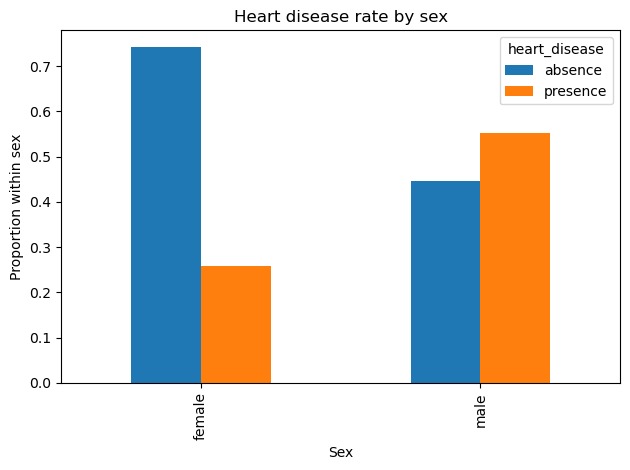


Chi-square p-value: 2.666712348180942e-06
Reject H0: sex is significantly associated with heart disease.


In [51]:
# relationship btwx sex and yes_hd or no_hd

alpha = 0.05

# 1) Contingency table
X_sex = pd.crosstab(heart["sex"], heart["heart_disease"])
print(X_sex)

# Proportions within sex (poster-friendly)
rate_sex = pd.crosstab(heart["sex"], heart["heart_disease"], normalize="index")
print("\nProportions within sex:")
print(rate_sex)

# 2) Plot (100% stacked bar)
plt.clf()
rate_sex.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Proportion within sex")
plt.title("Heart disease rate by sex")
plt.legend(title="heart_disease")
plt.tight_layout()
plt.show()

# 3) Chi-square test
chi2, pval_sex, dof, expected = chi2_contingency(X_sex)
print("\nChi-square p-value:", pval_sex)

if pval_sex < alpha:
    print("Reject H0: sex is significantly associated with heart disease.")
else:
    print("Fail to reject H0: not enough evidence of association.")

### Interpretation:

Females: heart disease rate = 25.8% (25/97)
Males: heart disease rate = 55.3% (114/206)

That’s a big gap: males in this sample are much more likely to be diagnosed with heart disease.

Chi-square p = 2.67e−06 (< 0.05) → significant association between sex and heart disease status.


Sex is significantly associated with heart disease: presence rate is 55.3% in males vs 25.8% in females (χ² p = 2.67e−06).